# Inscriptiones Christianae Graecae

## Preliminaries

In [43]:
from citableclass.base import Citableloader
import pandas as pd
import re
import ipywidgets as widget
import pickle

## Loading data

Using the citableclass, we can access the collection through its DOI. 

In [2]:
cite = Citableloader('10.17171/1-8')

The collection description can be obtained using the `landingpage` function.

In [6]:
cite.landingpage()

The full collection data can be accessed via the `collection` call.

In [25]:
data = cite.collection()

## Structure of data 

To get an overview of the structure of the collection, we normalize a single entry and display its dataframe.

In [27]:
testDF = pd.io.json.json_normalize(data['68'])

In [49]:
testDF.columns

Index(['_id', '_rev', 'ancient_city_id', 'ancientcity.dai_gaz_id',
       'ancientcity.geonames_id', 'ancientcity.id', 'ancientcity.info',
       'ancientcity.latitude', 'ancientcity.longitude', 'ancientcity.name',
       'ancientcity.pleiades_id', 'ancientcity.region_category', 'comment',
       'creation_date', 'critics', 'dating_centuries', 'dating_filter_key',
       'dating_str', 'descr_medium', 'doi', 'id', 'kind', 'kind_filter_key',
       'metadata.Annotations.Subjects', 'metadata.Annotations.Version',
       'metadata.Conditions for use.Rights',
       'metadata.General Information.Creator',
       'metadata.General Information.DOI',
       'metadata.General Information.Publication Year',
       'metadata.General Information.Publisher',
       'metadata.General Information.Title',
       'metadata.References.Bibliography', 'metadata.References.Editions',
       'metadata.Specific attributes.Holder digital source',
       'metadata.Specific attributes.Origin / Holder object',
 

### Greek characters

Since the original inscriptions are in greek, we might want to search words in greek. For this aim we need a list of greek characters. 

This is given by

In [ ]:
greek_letters=[chr(code) for code in range(945,970)]

We can then contruct regular expressions with these characters. 

For example, all sets of two or three characters followed by a whitespace is given by

In [30]:
greek_pat = '[' + ''.join(greek_letters) + ']{2,3}\s' 
greek_pat

'[αβγδεζηθικλμνξοπρςστυφχψω]{2,3}\\s'

Taking the text of entry number 68, we can search in the following way.

In [35]:
greektStri = testDF.search_text.values[0]

In [36]:
re.findall(greek_pat,greektStri)

['νου ',
 'ρου ',
 'κε ',
 'ιου ',
 'κε ',
 'των ',
 'φων ',
 'ιρω ',
 'κε ',
 'νου ',
 'κε ',
 'των ',
 'νων ',
 'της ',
 'εου ',
 'κε ',
 'νιω ',
 'σεν ',
 'τω ',
 'της ',
 'δρι ',
 'υλω ',
 'ερω ',
 'μης ']

## Data Preparation

The data consists of a large number of objects, where each objects information is a nested list. To convert this structure into a single dataframe, we loop over each entry.

In [38]:
len(data.keys())

3553

To display the progress, we use FloatProgress, and increment the value for every loop step.

In [41]:
dfList = []
N = len(data.keys()) 
f = widget.IntProgress(min=0, max=N)
display(f)
for key in data.keys():
    f.value += 1
    tempDF = pd.io.json.json_normalize(data[key])
    dfList.append(tempDF)
print('Done!')

IntProgress(value=0, max=3553)

Done!


Since data preparation takes some time, it is possible to save the converted data as a pickle file, which can be loaded for further editing.

In [44]:
#pickle.dump(dfList, open( "./data/ICG_rawlist.p", "wb" ) )

#Load by using
#dfList = pickle.load(open("./data/icg_rawlist.p", "rb" ) )

## Reducing the data

The dimensions of the full concatenated dataframe are roughly 2800 times 30000 entries, due to the conversion from JSON to the dataframe format. We therefore build a new dataframe with the requiered information only.
Since we have ~30000 different keys in the dataframe we search for keys containing specific strings:

In [50]:
listDF = [x[['_id','doi','ancientcity.name','ancientcity.info','ancientcity.latitude','ancientcity.longitude','dating_centuries','dating_str','transl_text','search_text']] for x in dfList]

Now we can build a new dataframe with only cityname, coordinates, date and the translated text. Using pandas concat we put all data in one dataframe. 

In [53]:
df = pd.concat(listDF).reset_index(drop=True)

In [54]:
df

,_id,doi,ancientcity.name,ancientcity.info,ancientcity.latitude,ancientcity.longitude,dating_centuries,dating_str,transl_text,search_text
0,inscription-130,10.17171/1-8-324,Comitanassus,North Lycaonia,38.140402,33.363370,"[c4, c5, c6, c7]",300 - 700,Denkmal der Matrone.,Μνημη Ματρωνης.
1,inscription-1788,10.17171/1-8-857,Milet,,37.521575,27.277705,"[c6, c7]",500 - 650,(Unter) unserem heiligsten E(rzbischof) ... (u...,επι του αγιωτατου ημων αρχιεπισκοπου– – – – – ...
2,inscription-28,10.17171/1-8-1951,Gdanmaa/Ekdaumaua,"also Egdava, North Lycaonia",38.614766,32.561380,"[c4, c5, c6, c7]",300 - 700,(Das Grab / die Erde) birgt den höchst edlen (...,․․ Α γυη κατεχι πολυεσθιον ανδρα κρατιστον / Ε...
3,inscription-1281,10.17171/1-8-304,Congussus,North Lycaonia,38.301504,32.876326,"[c4, c5, c6]",300 - 600,"..., zum Gedenken.",ΠΓ μνημης χα ριν. +
4,inscription-3154,10.17171/1-8-2280,Thessalonica,,40.636884,22.950688,[c6],525 - 535,Tomb for two persons belonging to Martinus the...,+ Κοιμητηριον δισωμον διαφερον Μαρτινω τω θαυμ...
5,inscription-90,10.17171/1-8-3493,Laodicea Combusta,North Lycaonia,38.192186,32.374024,"[c2, c3, c4, c5, c6, c7, c8]",100 - 800,"… Mutter (?) und des Tieos, sie selbst \r\nfür...",— — — μητηρ και Τιηου αυτυ εαυτυς ζωντες μνημη...
6,inscription-3499,10.17171/1-8-2660,Corinth,,37.906033,22.879189,[c6],500 - 600,,Ꝑ A Ш
7,inscription-2143,10.17171/1-8-1247,Athens,,37.976525,23.725515,"[c3, c4]",200 - 350,"Grab (Platz) des Soterichos und der Zosimiane,...",τοπος Σωτηριχου και Ζωσιμιανης της γαμετης αυτου.
8,inscription-1955,10.17171/1-8-1039,Athens,,37.976525,23.725515,"[c5, c6]",400 - 600,Grab (Schlafstätte) des Hermophilos.,+ κυμη– τηριον Ερμοφι– λου. ♱
9,inscription-1495,10.17171/1-8-534,Congussus,North Lycaonia,38.301504,32.876326,"[c4, c5]",300 - 450,"Alexandros, Sohn des Asiati(kos), der Diakon, ...",☧ Αλεξανδρος Ασιατι κου διακων ιδια μη τρι ...


# Natural language processing for surnames

In [55]:
df.shape

(3553, 10)

Using tools from natural language processing, the next step is to search through a segmented version of the german translation to find proper nouns.

For this aim, we use treetagger (http://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/#Linux), which is faster on german text than, e.g., the stanford pos-tagger (http://nlp.stanford.edu/software/tagger.html). As a link to python, we make use of https://github.com/miotto/treetagger-python .

In [64]:
from treetagger import TreeTagger

ImportError: cannot import name 'TreeTagger'

In [65]:
tt = TreeTagger(path_to_home='./treetagger/cmd/tree-tagger-german')

NameError: name 'TreeTagger' is not defined

The parts-of-speech tag 'NE' marks proper nouns (Eigennamen in german), as specified by http://www.ims.uni-stuttgart.de/forschung/ressourcen/lexika/TagSets/stts-table.html

In [ ]:
[x[0] for x in tt.tag(df['transl_text'][13]) if x[1]=='NE']

To extend the dataframe with the information on the proper nouns in the translated text, we create a new column and apply the POS tagger.

In [ ]:
dfN = pd.DataFrame()
dfN['transl_text_ge'] = df.ix[:,'transl_text']
dfN.shape

In [ ]:
%%time

dfN['proper nouns'] = dfN['transl_text_ge'].apply(lambda row: [x[0] for x in tt.tag(row) if row !='' and x[1]=='NE'])

Again, we can save the new dataframe as a pickle file.

In [24]:
# Save data as pickle
#dfN.to_pickle('./data/icg_proper_nouns.pickle')
# Create dateframe from pickle file
#dfn = pd.read_pickle('./data/icg_proper_nouns.pickle')

In [25]:
dfn

,transl_text_ge,lang,pos_tagger_tags,proper_nouns
0,"Nikomakos (Nikomachos), gläubig.",de,"[[Nikomakos, NE, <unknown>], [(, $(, (], [Niko...","[Nikomakos, Nikomachos]"
1,"(Grab des) Euethios, des Sohnes des Pyrrhon, d...",de,"[[(, $(, (], [Grab, VVIMP, graben], [des, ART,...",[Euethios]
2,"Von Kalandion, dem Diakon, und Domnos, \r\ndem...",de,"[[Von, APPR, von], [Kalandion, NN, <unknown>],...",[Domnos]
3,... (hilf!) ?,de,"[[..., $., ...], [(, $(, (], [hilf, VVIMP, hel...",[]
4,Zum Gedenken an ...,de,"[[Zum, APPRART, zu], [Gedenken, NN, Gedenken],...",[]
5,Dieses ist das Grabmal des (…os): Wegen seines...,de,"[[Dieses, PDS, diese], [ist, VAFIN, sein], [da...",[]
6,Es wird erneuert der Palast (die Kirche) des E...,de,"[[Es, PPER, es], [wird, VAFIN, werden], [erneu...",[]
7,Antiochos errichtete dieses Mal seinem lieben ...,de,"[[Antiochos, NE, <unknown>], [errichtete, VVFI...","[Antiochos, Armenios]"
8,"Valentia errichtete (das Grab) für Paulos, den...",de,"[[Valentia, NE, Valentia], [errichtete, VVFIN,...","[Valentia, Paulos]"
9,"Aurilios (Aurelios) Aniketos, Sohn des Gaios (...",de,"[[Aurilios, NE, <unknown>], [(, $(, (], [Aurel...","[Aurilios, Aurelios, Gaios, Romula]"


To habe all information in one dataframe we extend the previously constructed one with the new informations.

In [ ]:
df['proper_nouns'] = dfn['proper nouns']

In [ ]:
df.dropna()

In [ ]:
dfAthens = df[df['ancientcity.name']=='Athens'].reset_index(drop=True)
lAth = list(dfAthens['proper_nouns'])
nameListAthens = [item for sublist in lAth for item in sublist if len(item) > 2]

In [26]:
# Save the final version of the dataframe
#df.to_pickle('./data/icg_full_with_nouns.pickle')
# Load by
df = pd.read_pickle('./data/icg_full_with_nouns.pickle')

In [27]:
dfNames = df.sort_values('ancientcity.name').dropna(subset=['ancientcity.latitude']).reset_index(drop=True)

In [28]:
dfNames.keys()

Index(['ancientcity.name', 'ancientcity.latitude', 'ancientcity.longitude',
       'dating_centuries', 'dating_str', 'transl_text', 'language',
       'proper_nouns'],
      dtype='object')

Every ancient city name corresponds to several found inscriptions. We therefore collect the information of the proper nouns and their dating into one dictonary, whose keys are the city names.

In [30]:
cityDict = {}
for city in list(dfNames['ancientcity.name']):
    tmpList = [[tmpdf['ancientcity.latitude'].iloc[0],tmpdf['ancientcity.longitude'].iloc[0]]]
    tmpdf = df[df['ancientcity.name']==city].reset_index(drop=True)
    tmpDict = {}
    for index in tmpdf.index:
        if tmpdf['proper_nouns'].iloc[index] != []:
            tmpDict[tmpdf['dating_str'].iloc[index]] = tmpdf['proper_nouns'].iloc[index]
            tmpList.append(tmpDict)
    cityDict[city] = tmpList
        #print(tmpdf.iloc[index])

NameError: name 'tmpdf' is not defined

Getting the city names

In [31]:
cityDict.keys()

dict_keys([])

Getting the coordinates of a city

In [90]:
cityDict['Acmoneia'][0]

[38.65813, 29.772919999999999]

Getting the different dating periods by keys

In [89]:
cityDict['Acmoneia'][1].keys()

dict_keys(['200 - 400', '248 - 249', '400 - 550', '351 - 354', '254 - 255', '175 - 200', '253 - 254', '200 - 300', '220 - 221', '300 - 450', '800 - 1100', '100 - 300', '700 - 850', '212 - 300', '243 - 244', '1083 - 1090', '200 - 350', '212 - 350'])

Getting the names of a dating period

In [92]:
cityDict['Acmoneia'][1]['200 - 400']

['Hedia', 'Christin']

# Histogram of Name occurance

In [17]:
%matplotlib notebook

<IPython.core.display.Javascript object>


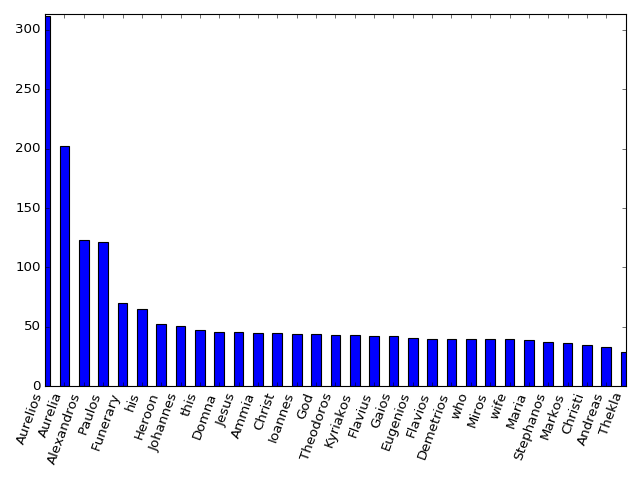

In [44]:
allNames = [item for sublist in list(df['proper_nouns']) for item in sublist if len(item) > 2 ]
counter=collections.Counter(allNames)
xmax = 30
f, axs = pl.subplots(1, sharex=True, sharey=True)
d = OrderedDict(sorted(counter.items(), key=lambda t: t[1],reverse=True))
X = np.arange(len(d))
pl.bar(X, d.values(), align='center', width=0.5)
pl.xticks(X, d.keys())#,rotation=70)
ymax = max(d.values()) + 1
pl.ylim(0, ymax)
pl.xlim(0,xmax)
pl.setp(axs.xaxis.get_majorticklabels(), rotation=70, horizontalalignment='right' )
pl.tight_layout()
pl.show()

# Geographical distribution of inscriptions



To get an overview of the geographical distribution of the various proper nouns, we make use of the folium package. One can define markers with the corresponding ancient city name and the occuring proper nouns at the given coordinates.

In [29]:
icg_map = folium.Map(location=[df["ancientcity.latitude"].mean(axis=0),df["ancientcity.longitude"].mean(axis=0)], zoom_start=5)
icg_map.add_tile_layer(name='Stamen', tiles='Stamen Terrain')
f = FloatProgress(min=0, max=len(cityDict.keys()))
display(f)
marker_cluster = folium.MarkerCluster('Coordinates').add_to(icg_map)
for name in cityDict.keys():
    f.value += 1
    if len(cityDict[name]) > 1:
        popups = 'City: ' + name + ', Names: ' +  str(cityDict[name][1])
    else:
        popups = 'City: ' + name + ', no names.'
                                                
    folium.Marker(cityDict[name][0], popup=popups).add_to(marker_cluster)
icg_map.add_children(marker_cluster)
icg_map.add_children(folium.map.LayerControl())

NameError: name 'cityDict' is not defined

# Building individual histograms of name frequency for each city

<IPython.core.display.Javascript object>


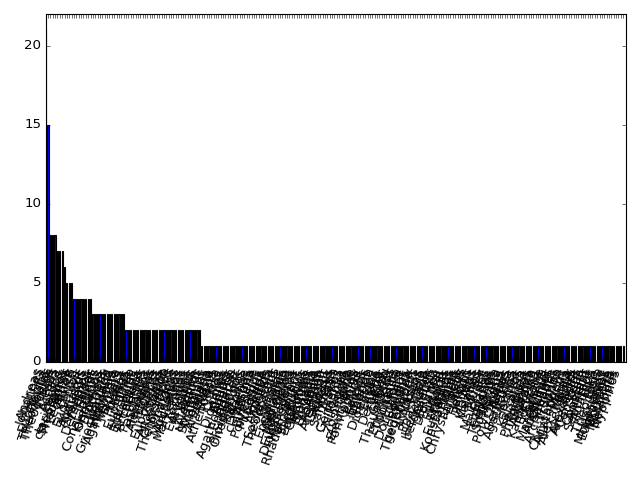

In [145]:
dfRed = (df[df['ancientcity.name']=='Athens']).reset_index(drop=True)
allNames = [item for sublist in list(dfRed['proper_nouns']) for item in sublist if len(item) > 2 ]
counter=collections.Counter(allNames)
d = OrderedDict(sorted(counter.items(), key=lambda t: t[1],reverse=True))
#xmax = 30
f, axs = pl.subplots(1, sharex=True, sharey=True)
X = np.arange(len(d))
pl.bar(X, d.values(), align='center', width=0.5)
pl.xticks(X, d.keys())#,rotation=70)
ymax = max(d.values()) + 1
pl.ylim(0, ymax)
pl.xlim(0,len(d))
pl.setp(axs.xaxis.get_majorticklabels(), rotation=70, horizontalalignment='right' )
pl.tight_layout()
pl.show()

In [174]:
%matplotlib notebook

In [230]:
dfLocal = pd.DataFrame(data=d,index=range(0,1),dtype=int).T#.reset_index()
dfLocal.columns = ['Occurancy']
dfLocalRed = dfLocal[dfLocal['Occurancy'] > 3]

In [255]:
vincent.core.initialize_notebook()
vis3 = vincent.Bar(dfLocalRed['Occurancy'])#, width=400, height=200)
vis3.axis_titles(x='Names', y='Occurancy')
vis3.colors(brew='Set1')
vis3.x_axis_properties(title_size=12, title_offset=40, label_angle=-45, label_align="right", color=None)
#vis3.to_json('data/vis3.json')


In [254]:
## For creating pie instead of bar charts

In [ ]:
pie = vincent.Pie(dfLocal[dfLocal['Name'] > 3])
pie.legend('Names')
pie.to_json('data/')